In [10]:
import os
import matplotlib.pyplot as plt

def save_fig(fig_name, tight_layout=True, fig_extension="png", resolution=300):
    """
    Save a matplotlib figure to reports/figures/ with consistent settings.
    """
    path = os.path.join("reports", "figures", fig_name + "." + fig_extension)
    os.makedirs(os.path.dirname(path), exist_ok=True)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution, bbox_inches="tight")
    print(f"✅ Figure saved to {path}")


In [2]:
import sys
sys.path.append('../src')

from data_loader import load_airbnb_data, basic_info

df = load_airbnb_data("../data/raw/listings.csv")  # replace filename if needed
basic_info(df)


Dataset shape: (84055, 18)

Missing values:
 neighbourhood_group               84055
price                             30092
last_review                       19557
reviews_per_month                 19557
license                           17621
host_name                            24
name                                  0
id                                    0
neighbourhood                         0
host_id                               0
room_type                             0
longitude                             0
latitude                              0
number_of_reviews                     0
minimum_nights                        0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
dtype: int64

Column types:
 id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               floa

In [3]:
# Drop columns that are fully missing or irrelevant
df.drop(columns=["neighbourhood_group"], inplace=True)

# Drop rows with missing target (price)
df = df[df["price"].notnull()]

# Optional: reset index
df.reset_index(drop=True, inplace=True)


✅ Figure saved to reports\figures\price_distribution_log.png


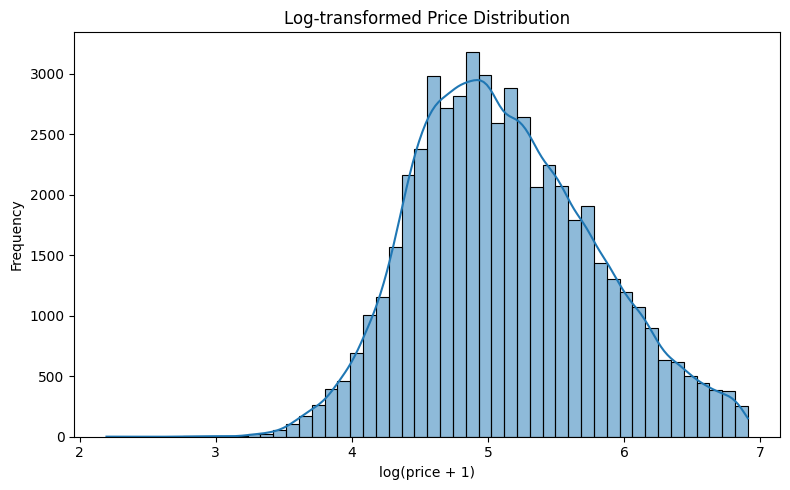

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Remove extreme outliers before plotting
df = df[df["price"] < 1000]

# Log price for modeling
df["log_price"] = np.log1p(df["price"])

plt.figure(figsize=(8,5))
sns.histplot(df["log_price"], bins=50, kde=True)
plt.title("Log-transformed Price Distribution")
plt.xlabel("log(price + 1)")
plt.ylabel("Frequency")
save_fig("price_distribution_log")
plt.show()


✅ Figure saved to reports\figures\log_price_by_room_type.png


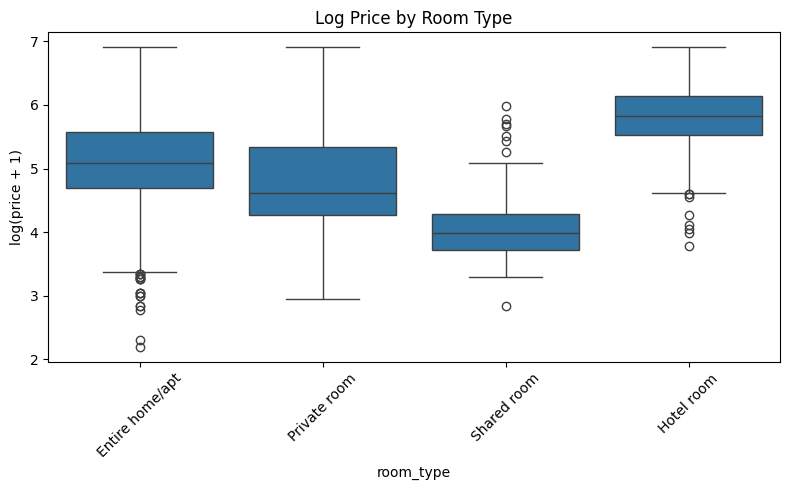

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x='room_type', y='log_price', data=df)
plt.title("Log Price by Room Type")
plt.ylabel("log(price + 1)")
plt.xticks(rotation=45)
save_fig("log_price_by_room_type")
plt.show()


C:\Users\Maria\AppData\Local\Temp\ipykernel_25516\3207682563.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neighborhoods.values, y=top_neighborhoods.index, palette="viridis")


✅ Figure saved to reports\figures\top_neighborhoods.png


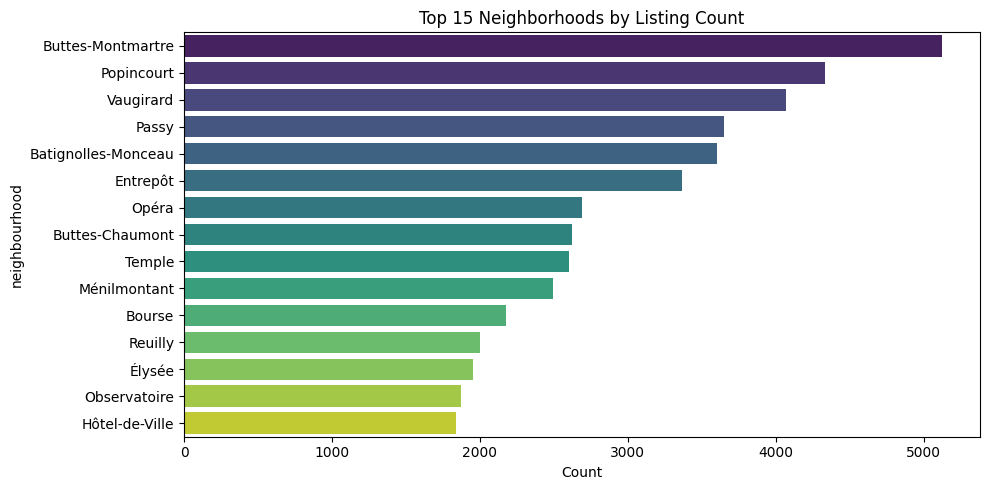

In [17]:
top_neighborhoods = df['neighbourhood'].value_counts().nlargest(15)

plt.figure(figsize=(10,5))
sns.barplot(x=top_neighborhoods.values, y=top_neighborhoods.index, palette="viridis")
plt.title("Top 15 Neighborhoods by Listing Count")
plt.xlabel("Count")
save_fig("top_neighborhoods")
plt.show()


✅ Figure saved to reports\figures\correlation_matrix.png


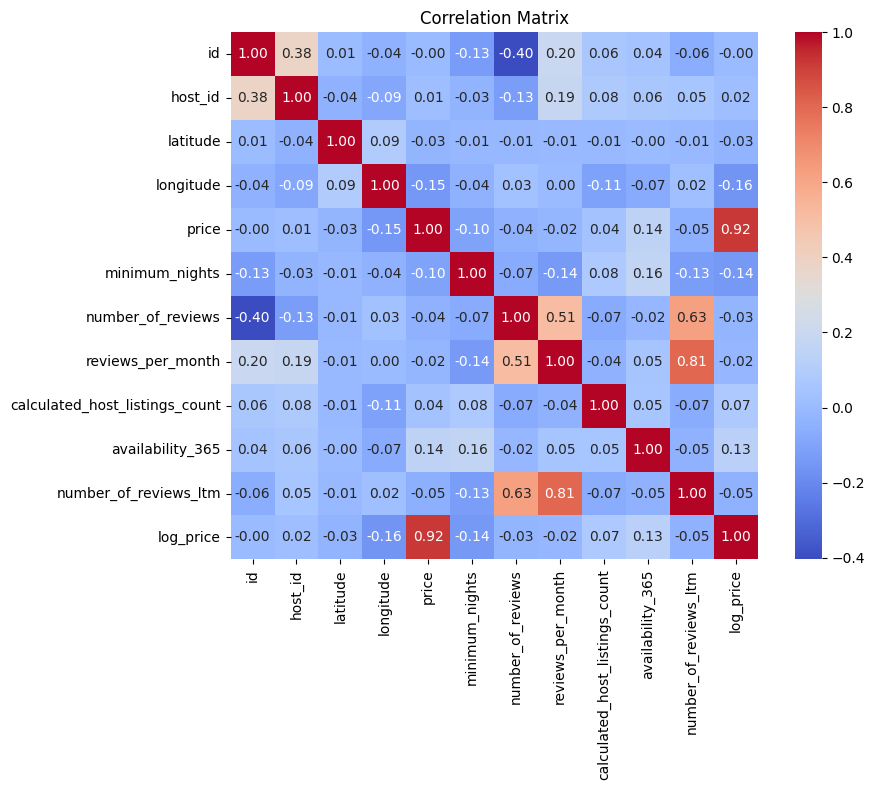

In [18]:
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
save_fig("correlation_matrix")
plt.show()
